In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
df = pd.read_csv('clean_data.csv')

In [4]:
# Test different numbers of topics using reconstruction error

# Create a vectorizer
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(df["Lyric"])

# Define a range of possible numbers of topics to test
num_topics_range = range(5, 41, 5)

# Initialize an empty list to store the NMF scores
nmf_scores = []

# Test different numbers of topics
for num_topics in num_topics_range:
    nmf = NMF(n_components=num_topics)
    data_nmf = nmf.fit_transform(data_vectorized)
    reconstruction_error = nmf.reconstruction_err_
    nmf_scores.append(reconstruction_error)

print("Reconstruction Error:", nmf_scores)

Reconstruction Error: [7996.94292842944, 7715.5278852683105, 7514.1871737658885, 7343.39848739016, 7195.260581545153, 7068.700923121643, 6957.873765327525, 6859.986314882657]


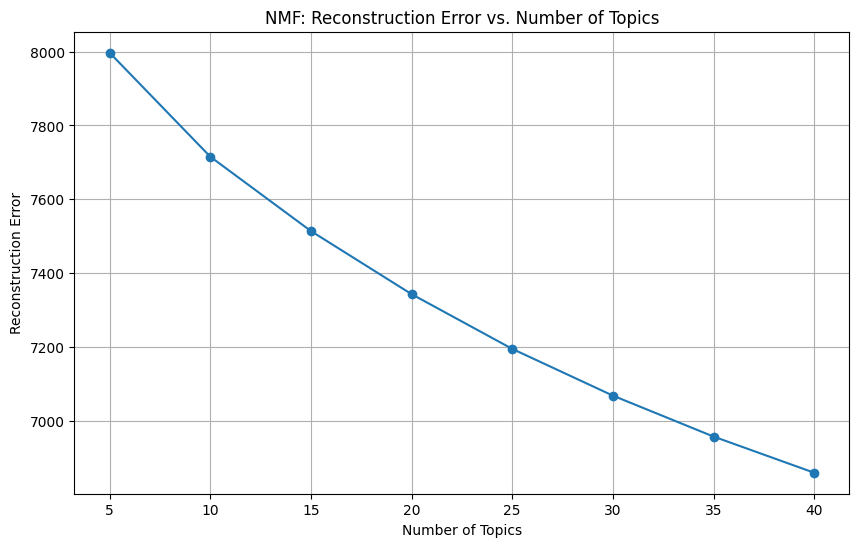

In [5]:
# Plot the reconstruction error scores
plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, nmf_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Reconstruction Error")
plt.title("NMF: Reconstruction Error vs. Number of Topics")
plt.grid(True)
plt.show()

In [6]:
# Apply NMF using 10 topics 
# Create a vectorizer
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(df["Lyric"])

In [7]:
# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=10)
data_nmf = nmf.fit_transform(data_vectorized) 

In [8]:
# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: get, bitch, shit, nigga, fuck, money, man, be, ass, big, tell, right, hit, look, real, got, work, wanna, good, talk
Topic #2: love, heart, need, fall, find, true, feel, hold, way, sweet, kiss, forever, touch, give, thing, believe, hurt, song, little, make
Topic #3: know, tell, think, well, thing, wanna, try, right, need, shit, say, like, nigga, be, mean, talk, look, cause, fuck, man
Topic #4: come, home, run, little, man, wait, light, hear, dance, sun, dream, shit, bring, say, nigga, rain, alive, play, hand, sing
Topic #5: go, long, tonight, home, away, leave, tell, think, say, run, night, stop, find, day, break, rock, wrong, turn, try, head
Topic #6: let, wanna, dance, tonight, body, right, hold, rock, turn, hand, light, party, start, ride, shake, night, hear, heart, stop, roll
Topic #7: want, need, wanna, tell, think, body, bad, thing, boy, like, leave, live, stop, right, say, free, tonight, little, hold, money
Topic #8: baby, wanna, right, shake, night, tell, good, tonight

In [11]:
# Write the top words for each topic into a txt file
output_file_path = "nmf_top_words_per_topic_without_weights.txt"
with open(output_file_path, "w") as file:
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(nmf.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]
        file.write(f"Topic #{topic_idx + 1}: {', '.join(top_words)}\n")

In [12]:
# Print the top words for each topic and their weights
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    top_words_with_weights = [(feature_names[i], topic[i]) for i in topic.argsort()[:-20 - 1:-1]]
    print(f"Topic #{topic_idx + 1}:")
    for word, weight in top_words_with_weights:
        print(f"{word} ({round(weight, 3)})", end=", ")
    print()

Topic #1:
get (43.083), bitch (5.331), shit (5.032), nigga (4.965), fuck (4.836), money (3.914), man (3.321), be (3.071), ass (2.192), big (2.125), tell (2.046), right (2.045), hit (1.944), look (1.936), real (1.683), got (1.498), work (1.441), wanna (1.441), good (1.413), talk (1.392), 
Topic #2:
love (39.3), heart (1.841), need (1.721), fall (0.935), find (0.629), true (0.62), feel (0.6), hold (0.521), way (0.513), sweet (0.464), kiss (0.448), forever (0.436), touch (0.434), give (0.397), thing (0.385), believe (0.375), hurt (0.364), song (0.344), little (0.343), make (0.308), 
Topic #3:
know (31.222), tell (1.845), think (1.67), well (0.954), thing (0.948), wanna (0.871), try (0.8), right (0.729), need (0.653), shit (0.652), say (0.651), like (0.632), nigga (0.631), be (0.611), mean (0.611), talk (0.532), look (0.53), cause (0.504), fuck (0.491), man (0.473), 
Topic #4:
come (31.932), home (1.989), run (0.938), little (0.797), man (0.751), wait (0.711), light (0.672), hear (0.657), 

In [14]:
# Write the top words and thier weights into a txt file
output_file_path = "nmf_top_words_per_topic_with_weights.txt"
with open(output_file_path, "w") as file:
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(nmf.components_):
        top_words_with_weights = [(feature_names[i], topic[i]) for i in topic.argsort()[:-20 - 1:-1]]
        file.write(f"Topic #{topic_idx + 1}:\n")
        file.write(", ".join([f"{word} ({round(weight, 3)})" for word, weight in top_words_with_weights]))
        file.write("\n")

In [17]:
# Plot top words 
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(40, 18), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=25)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('NMF: Top Words', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.80, hspace=0.2)
  plt.show()

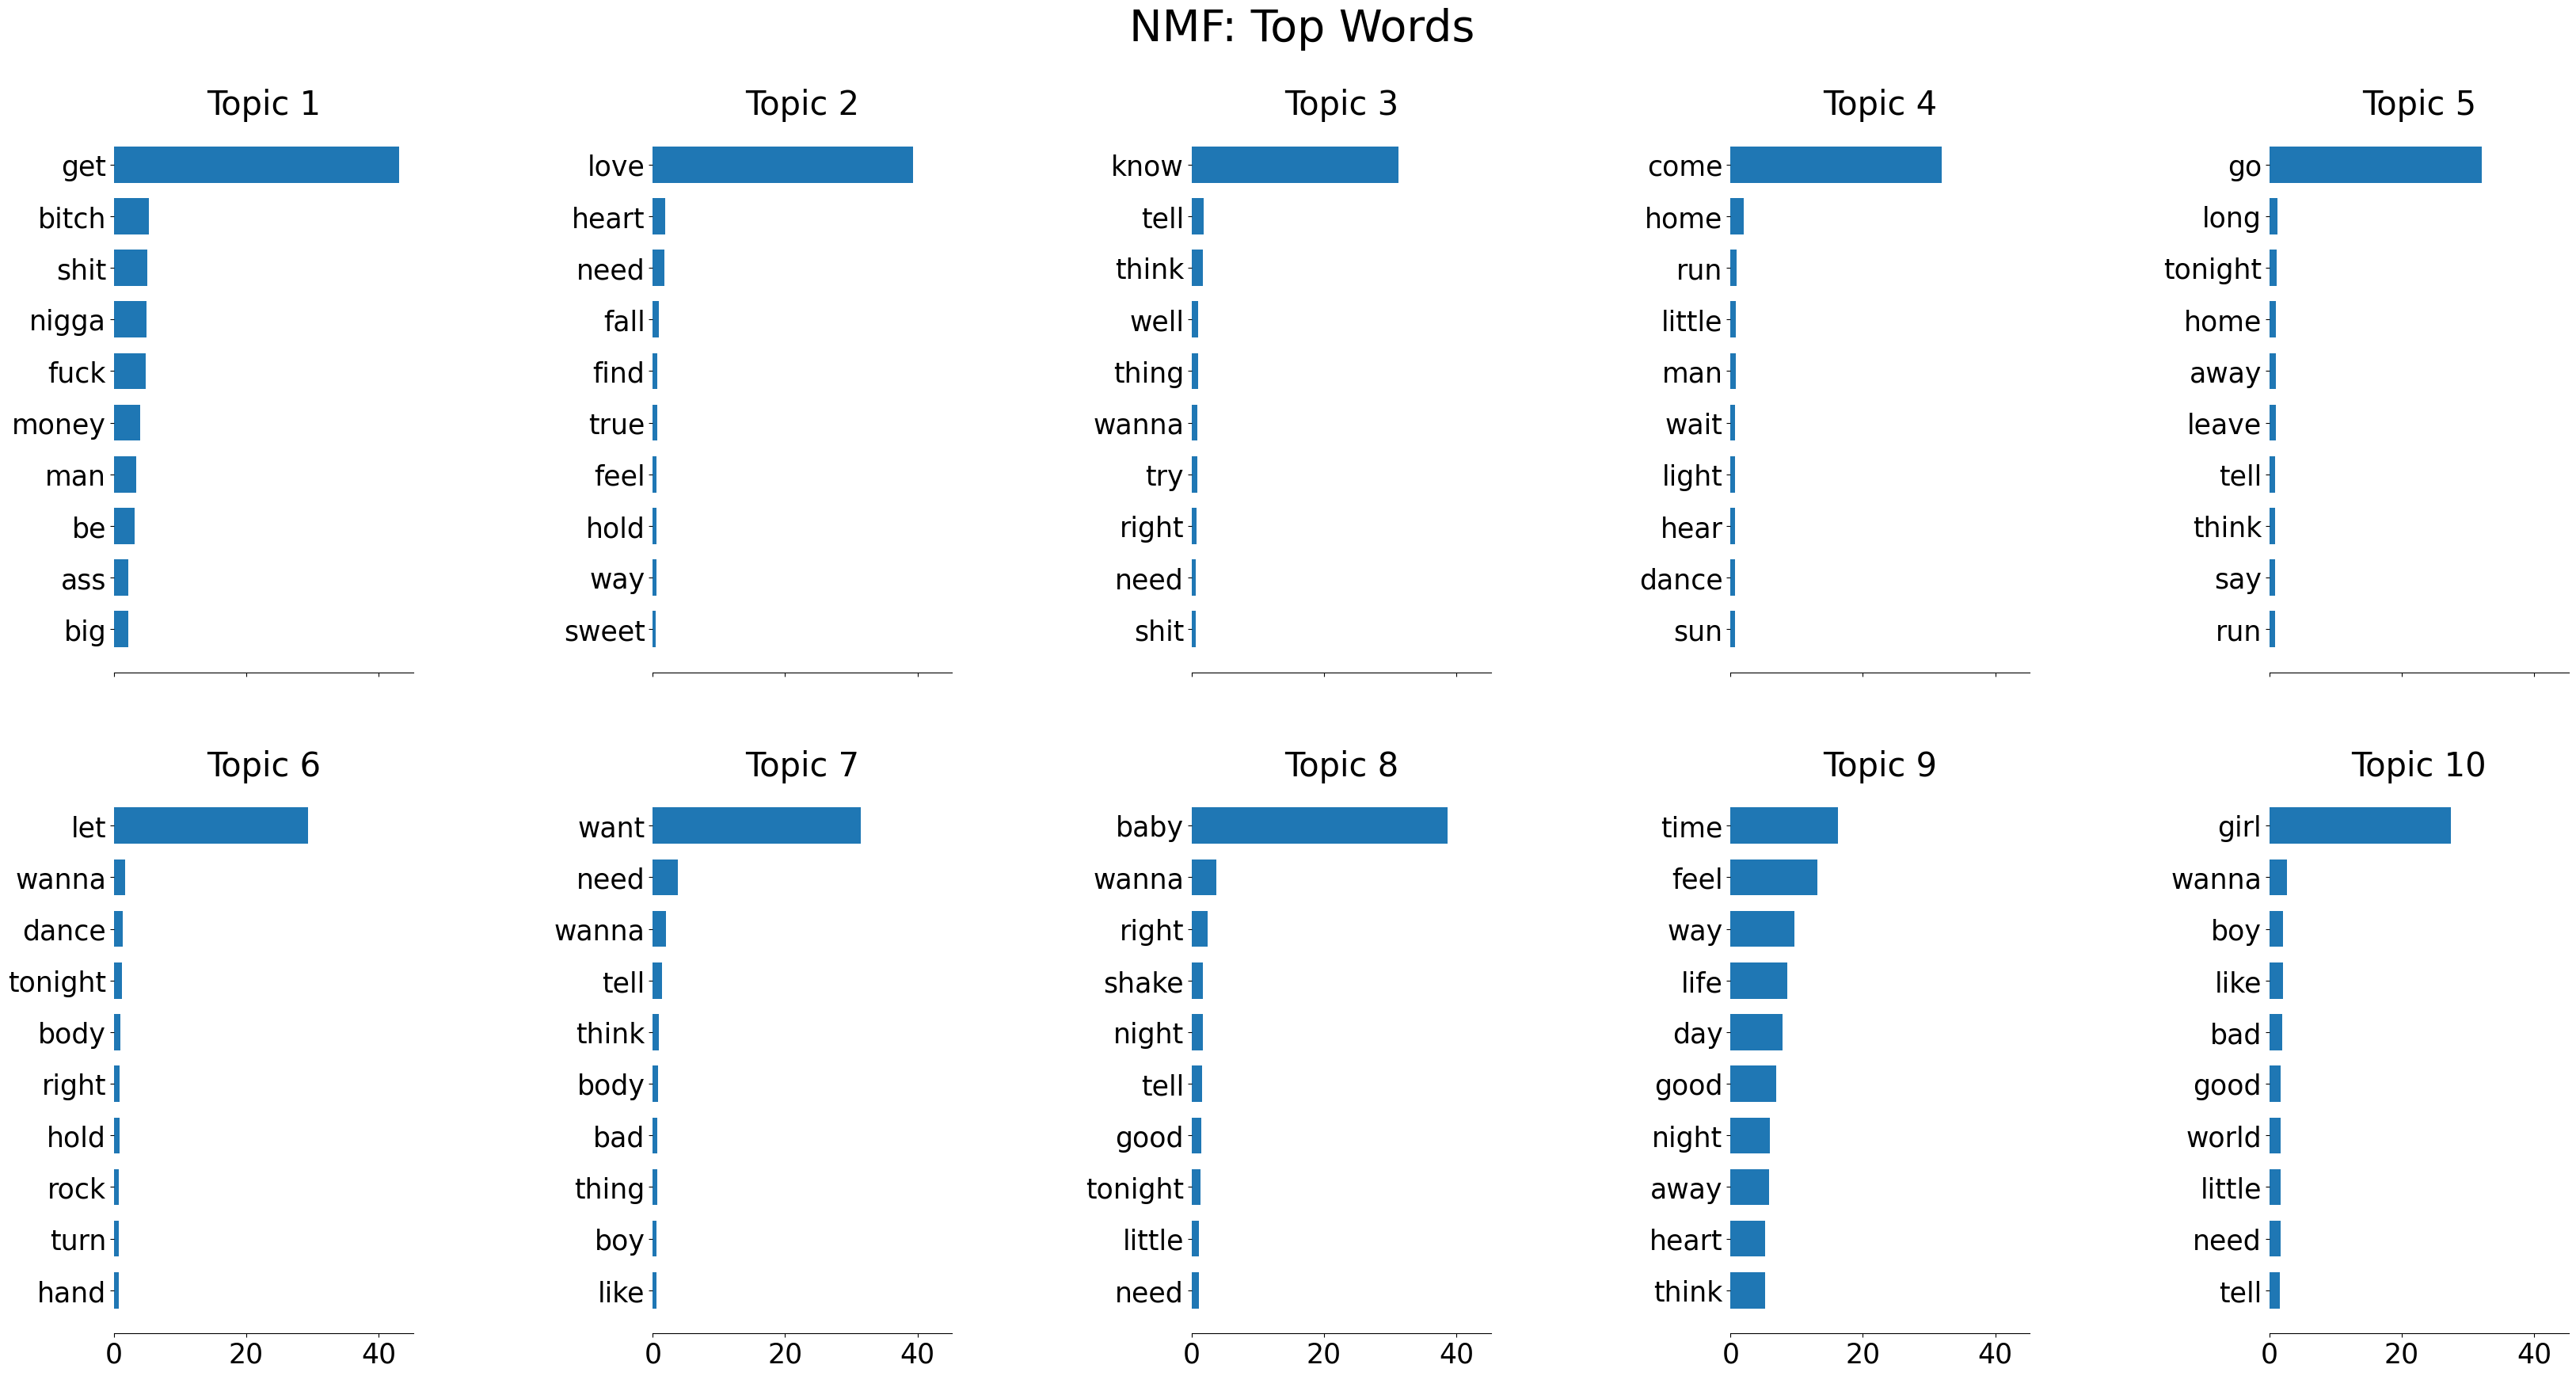

In [18]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf, feature_names)